### Resampling days to week and labeling each week with its number.

In [1]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
# function to resample temperature from dialy to weekly
def resample_to_week(daily_temperature_by_city) :
    resampled_data_by_week = daily_temperature_by_city['Avg'].resample('W').mean()
    
    weekly_average_temperature_df = resampled_data_by_week.to_frame()
    weekly_average_temperature_df.reset_index(inplace = True)
    weekly_average_temperature_df.rename(columns={'Avg': 'average_temperature', 'Date' : 'last_day_of_the_week',}, inplace = True)
    
    for index, day in weekly_average_temperature_df.iterrows() :
        weekly_average_temperature_df.loc[index, 'week'] = day['last_day_of_the_week'].isocalendar()[1]
        weekly_average_temperature_df.loc[index, 'year'] = day['last_day_of_the_week'].isocalendar()[0]
    
    weekly_average_temperature_df['week'] = weekly_average_temperature_df['week'].astype(int)
    weekly_average_temperature_df['year'] = weekly_average_temperature_df['year'].astype(int)
    
    return weekly_average_temperature_df


In [3]:
# load city data set
CSV_DF = []
CSV_DF = pd.read_csv("WEATHER_CSV/MASTER.csv")
CSV_LIST = []
CSV_LIST = CSV_DF['Name']
main_df =[]
resample_data =[]
#for loop that compiles weather CSVs based on master csv list
for city in CSV_LIST:
 city_df = pd.read_csv(f"WEATHER_CSV/{city}.csv", parse_dates =["Date"], index_col ="Date") 
 resample_data = resample_to_week(city_df)
 resample_data["State"]= city_df.iloc[0]['state']
 resample_data["City"]= city_df.iloc[0]['city_name']
 print(len(main_df))
 print(city)
 if len(main_df)<1:
    main_df=resample_data
 else:
    print('hello')
    main_df = main_df.append(resample_data)

main_df.to_csv('Complied_Weather.csv', encoding='utf-8', index=False)
main_df


0
ATLANTA_GA
599
CHICAGO_IL
hello
1198
DENVER_CO
hello
1797
DFW_TX
hello
2396
HOUSTON_TX
hello
2995
JFK_NY
hello
3594
LA_CA
hello
4193
PHILADELPHIA_PA
hello
4792
PHOENIX_AZ
hello
5391
SEATTLE_WA
hello
5990
SF_CA
hello


,last_day_of_the_week,average_temperature,week,year,State,City
0,2009-01-04,48.250000,1,2009,GA,Atlanta
1,2009-01-11,52.642857,2,2009,GA,Atlanta
2,2009-01-18,35.642857,3,2009,GA,Atlanta
3,2009-01-25,39.785714,4,2009,GA,Atlanta
4,2009-02-01,45.428571,5,2009,GA,Atlanta
...,...,...,...,...,...,...
594,2020-05-24,61.285714,21,2020,CA,San Francisco
595,2020-05-31,65.642857,22,2020,CA,San Francisco
596,2020-06-07,64.928571,23,2020,CA,San Francisco
597,2020-06-14,64.285714,24,2020,CA,San Francisco


In [4]:
# Generate a summary statistics table for desired states by year
year_group = main_df.groupby(['year'])
year_statistics = year_group.agg({'average_temperature':['mean', 'median', 'var', 'std', 'sem']})
year_statistics

average_temperature                                            
                    mean     median         var        std       sem
year                                                                
2009           59.940517  61.642857  252.542174  15.891576  0.658162
2010           60.950300  60.285714  256.786117  16.024547  0.670020
2011           60.787837  60.678571  260.914565  16.152850  0.675385
2012           62.078047  61.678571  216.359109  14.709151  0.615020
2013           60.567183  61.464286  243.511508  15.604855  0.652472
2014           61.122003  62.857143  254.638588  15.957399  0.667212
2015           61.761088  62.714286  253.410089  15.918860  0.659292
2016           62.626623  62.892857  225.561532  15.018706  0.627964
2017           62.412837  63.857143  228.138624  15.104258  0.631541
2018           61.625000  62.142857  249.685222  15.801431  0.660691
2019           61.387363  61.750000  249.508181  15.795828  0.660457
2020           57.392294  57.000000  170.784064  13.068438  0.788056

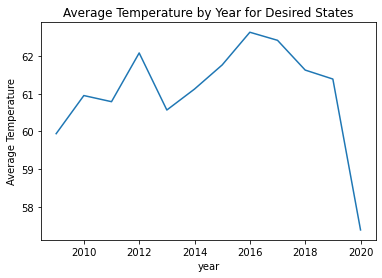

In [5]:
# Generate a line plot to compare average temperature for desired states by year
year_plot = year_group['average_temperature'].mean().plot(kind='line', title='Average Temperature by Year for Desired States')
year_plot.set_ylabel('Average Temperature')
plt.show()